<a href="https://colab.research.google.com/github/TobFleisch/IDPA/blob/main/HypnoseAnalyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import scipy.io.wavfile as waves
from scipy import stats
from scipy import signal
from scipy.io import wavfile

Importieren von libarys 

In [8]:
file_Hypnose = '/Hypnose.wav'


def trim_wav( originalWavPath, newWavPath , start, end ):

    sampleRate, waveData = wavfile.read( originalWavPath )
    startSample = int( start * sampleRate )
    endSample = int( end * sampleRate )
    wavfile.write( newWavPath, sampleRate, waveData[startSample:endSample])
 
 
wp = r'/Hypnose.wav'
trim_wav(wp, wp.replace(".wav", "_trimmed.wav"), 100,1000)

file_Hypnose = '/Hypnose_trimmed.wav'
fs, data = waves.read(file_Hypnose)




Durch Fehler an der Aufnahme, durch warscheindliches Berühren oder Kalibriationsfehler, wurde nur die Zeit von Sekund 100 - 1000 verwendet. 
Diese Werte können für neue files beliebend angepasst werden.

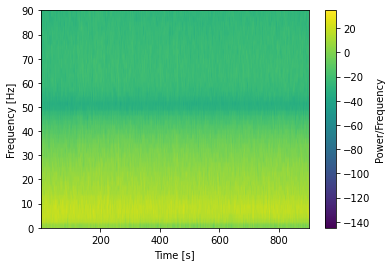

(0.0, 899.74)

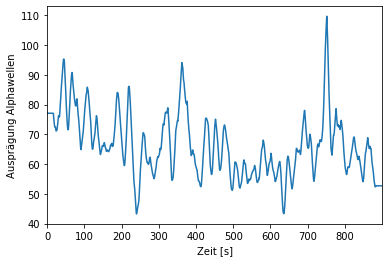

In [9]:
length_data=np.shape(data)
length_new=length_data[0]*0.05
ld_int=int(length_new)
data_new=signal.resample(data,ld_int)

data_new=signal.resample(data,ld_int)

plt.figure('Spectrogram')
d, f, t, im = plt.specgram(data_new, NFFT= 256, Fs=500, noverlap=250)
plt.ylim(0,90)
plt.colorbar(label= "Power/Frequency")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.show()

matrixf=np.array(f).T
np.savetxt('Frequencies.csv', matrixf)
df = pd.read_csv("Frequencies.csv", header=None, index_col=None)
df.columns = ["Frequencies"]
df.to_csv("Frequencies.csv", index=False)

position_vector=[]
length_f=np.shape(f)
l_row_f=length_f[0]
for i in range(0, l_row_f):
    if f[i]>=7 and f[i]<=12:
        position_vector.append(i)

length_d=np.shape(d)
l_col_d=length_d[1]
AlphaRange=[]
for i in range(0,l_col_d):
    AlphaRange.append(np.mean(d[position_vector[0]:max(position_vector)+1,i]))


def smoothTriangle(data, degree):
    triangle=np.concatenate((np.arange(degree + 1), np.arange(degree)[::-1])) # up then down
    smoothed=[]

    for i in range(degree, len(data) - degree * 2):
        point=data[i:i + len(triangle)] * triangle
        smoothed.append(np.sum(point)/np.sum(triangle))
    # Handle boundaries
    smoothed=[smoothed[0]]*int(degree + degree/2) + smoothed
    while len(smoothed) < len(data):
        smoothed.append(smoothed[-1])
    return smoothed

plt.figure('AlphaRange')
y=smoothTriangle(AlphaRange, 900)
plt.plot(t, y)
plt.xlabel('Zeit [s]')
plt.ylabel('Ausprägung Alphawellen')
plt.xlim(0,max(t))

